In [103]:
import pandas as pd
import numpy as np
import itertools 
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
palette = sns.color_palette(None, 81)

In [21]:
#MATRIX FACTORIZATION WITHOUT CROSS VALIDATION

start = time.time()
random.seed(3)

# Parameters reported on Mymedialite website
learn_rate=0.005
reg=0.05
num_factors=10
num_iter=75

x = ratings.pivot(index='MovieID', columns='UserID', values='Rating') 
M=np.random.rand(x.shape[0],num_factors) #Initialize the weights in M randomly (the number of rows is the number of movies, the number of columns is 10: num_factors)
M=pd.DataFrame(M, index=x.index) 
U=np.random.rand(num_factors,x.shape[1]) #Initialize the weights in U randomly (the number of columns is the number of users, the number of rows is 10: num_factors)
U=pd.DataFrame(U, columns=x.columns)

indexes=x[x.notnull()].stack().index
iterat=1
rmse=100
newrmse=99

while (iterat < num_iter and newrmse-rmse < 0.01 ): #Matrix Factorization algorithm
    print('iteration: ' + str(iterat))
    iterat += 1
    for k in indexes: #iterate over each known element of X
        movie = M.loc[k[0],]
        user = U.loc[:,k[1]]
        x_hat = np.dot(movie,user) #Predicted rating
        error = x.loc[k[0],k[1]] - x_hat #Compute the training error
        M.loc[k[0],] = movie + learn_rate * (2*error*user - reg*movie) #Update the corresponding row of M based on the equation from the paper
        U.loc[:,k[1]] = user + learn_rate * (2*error*movie - reg*user) #Update the corresponding columns of U based on the equation from the paper
            
    factoriz=pd.DataFrame(np.matmul(M, U), index=x.index, columns= x.columns)
    rmse=newrmse
    newrmse=np.sqrt(((factoriz-x)**2).mean().mean()) #Compute the new RMSE, and check whether it has decreased before next loop
            
mae = abs(factoriz-x).mean().mean()

end = time.time()
print('The runtime of the algorithm is: {}'.format(round(end - start,3)))
print('The RMSE of the linear regression without intercept is: {}'.format(round(newrmse,5)))
print('The MAE of the linear regression without intercept is: {}'.format(round(mae,5)))

iteration: 1


<ipython-input-21-f2bce92bf0f6>:30: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  factoriz=pd.DataFrame(np.matmul(M, U), index=x.index, columns= x.columns)


iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24


KeyboardInterrupt: 

KeyboardInterrupt: 

In [23]:
newrmse

1.1383627414864432

In [22]:
mae

0.9462679332635666

In [24]:
# Find Id of movie with ratings
rated_id = [id in np.array(ratings[['MovieID']]) for id in np.array(movies[['MovieID']])]
movies_rated = movies.loc[rated_id]

In [25]:
dates = [s[-5:-1] for s in movies_rated.loc[:,'Title']]

In [26]:
genres = [s.split('|')[0] for s in movies_rated.loc[:,'Genres']]

In [126]:
G=np.unique(genres)
D=np.unique(dates)

In [28]:
from sklearn.decomposition import PCA

In [29]:
# Start by visualizing users
pca = PCA(n_components=2)

PCs = pca.fit_transform(U.transpose())

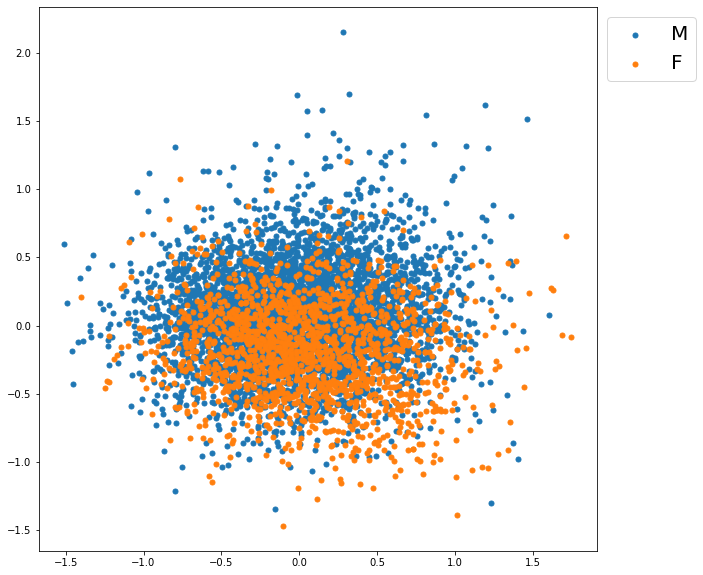

In [30]:
# Visualize users labelled by genders
plt.figure(figsize=(10,10)) 

for gender in ['M', 'F']:
    mask = np.array(users[['Gender']] == gender)
    mask = [mask[i][0] for i in range(len(mask))]
    plt.scatter(PCs[mask, 0], PCs[mask, 1], label=gender, s=25, alpha=1)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=20)

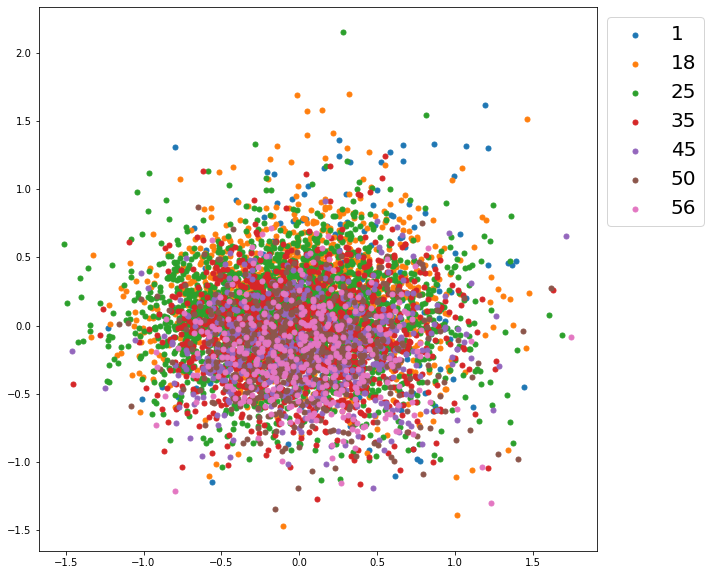

In [31]:
# Visualize users labelled by age
plt.figure(figsize=(10,10)) 
ages = np.unique(users['Age'])

for age in ages:
    mask = np.array(users[['Age']] == age)
    mask = [mask[i][0] for i in range(len(mask))]
    plt.scatter(PCs[mask, 0], PCs[mask, 1], label=age, s=25, alpha=1)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=20)

AttributeError: 'NoneType' object has no attribute 'create_artists'

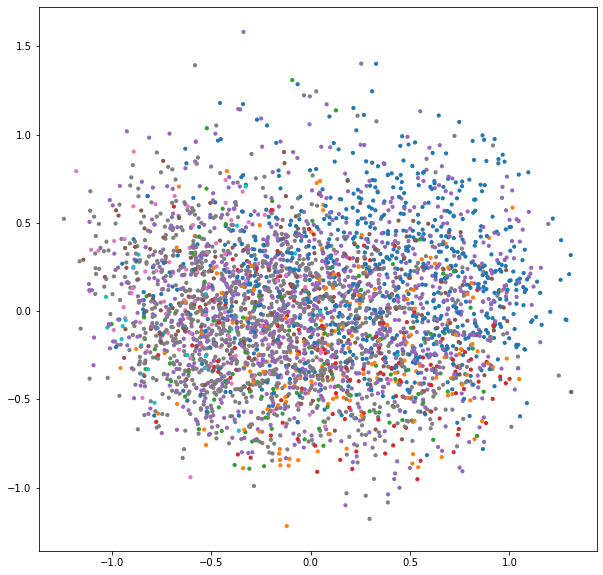

In [136]:
# Visualize movies labelled by genre
pca = PCA(n_components=2)

PCs = pca.fit_transform(M)

plt.figure(figsize=(10,10)) 
i=0
labels = []
groups_c = []
colours = np.zeros((M_tsne.shape[0],3))

for genre in G:
    mask = np.array(genres) == genre
    #mask = [mask[i][0] for i in range(len(mask))]
    c = palette[i]
    if not c in groups_c:
        groups_c += [c]
    colours[mask,:] = c
    if not genre in labels:
        labels += [genre]
    i+=1
    
plt.scatter(PCs[:, 0], PCs[:, 1], s=10, alpha=1, c = colours)

plt.legend(groups_c, labels,bbox_to_anchor=(1.00, 1),loc='upper left',fontsize=20)

AttributeError: 'NoneType' object has no attribute 'create_artists'

<Figure size 720x720 with 0 Axes>

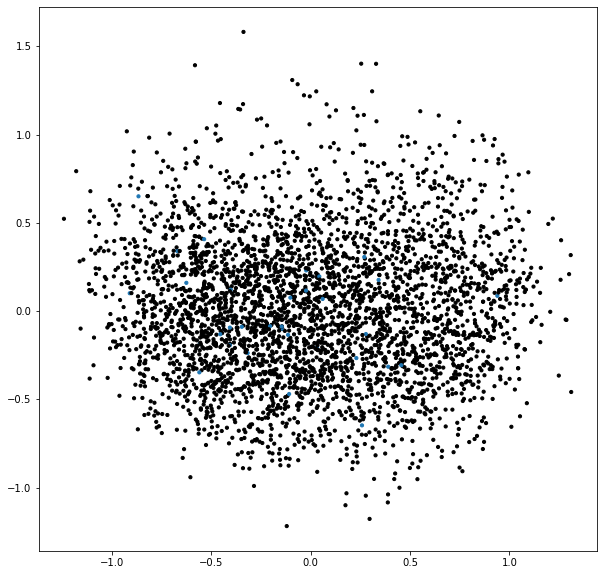

In [138]:
# Visualize movies labelled by year of release

plt.figure(figsize=(10,10)) 

plt.figure(figsize=(10,10)) 
i=0
labels = []
groups_c = []
colours = np.zeros((M_tsne.shape[0],3))


for date in D:
    mask = np.array(genres) == genre
    #mask = [mask[i][0] for i in range(len(mask))]
    c = palette[i]
    if not c in groups_c:
        groups_c += [c]
    colours[mask,:] = c
    if not date in labels:
        labels += [date]
    i+=1
    
plt.scatter(PCs[:, 0], PCs[:, 1], s=10, alpha=1, c = colours)

plt.legend(groups_c, labels,bbox_to_anchor=(1.00, 1),loc='upper left',fontsize=20)

## UMAP

In [45]:
import umap

In [46]:
# Visualize users labelled by genders
umap = umap.UMAP()
X_u = umap.fit_transform(U.transpose())

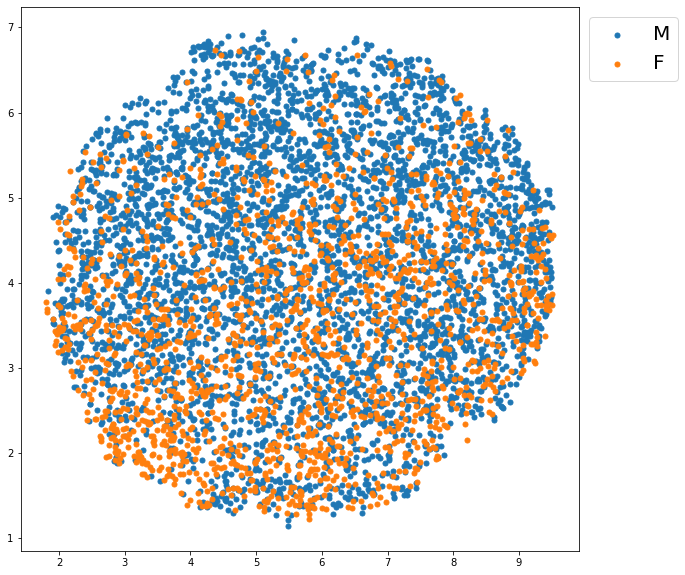

In [47]:
plt.figure(figsize=(10,10)) 

for gender in ['M', 'F']:
    mask = np.array(users[['Gender']]) == gender
    mask = [mask[i][0] for i in range(len(mask))]
    plt.scatter(X_u[mask, 0], X_u[mask, 1], label=gender, s=25, alpha=1)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=20)

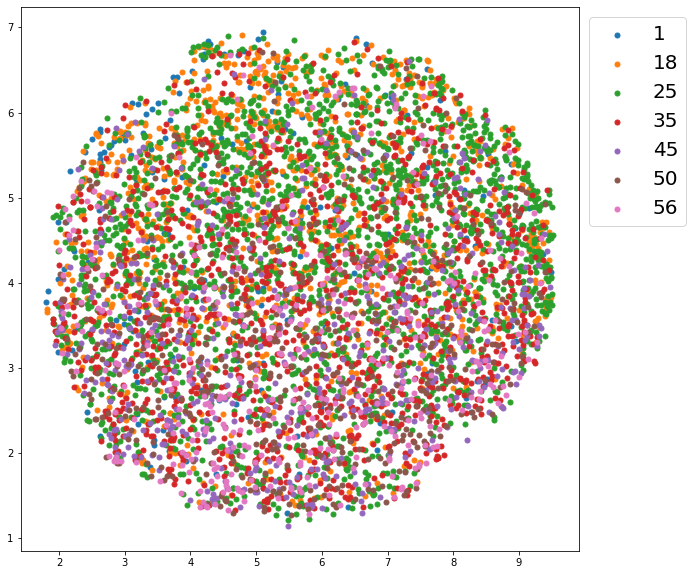

In [48]:
# Visualize users labelled by age
plt.figure(figsize=(10,10)) 
ages = np.unique(users['Age'])

for age in ages:
    mask = np.array(users[['Age']]) == age
    mask = [mask[i][0] for i in range(len(mask))]
    plt.scatter(X_u[mask, 0], X_u[mask, 1], label=age, s=25, alpha=1)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=20)

In [139]:
# Visualize movies labelled by genre
import umap
umap = umap.UMAP()
X_m = umap.fit_transform(M)

plt.figure(figsize=(10,10)) 
i=0
labels = []
groups_c = []
colours = np.zeros((M_tsne.shape[0],3))

for genre in genres:
    mask = np.array(genres) == genre
    #mask = [mask[i][0] for i in range(len(mask))]
    c = palette[i]
    groups_c +=[c]
    colours[mask] = np.array(c)
    labels[i] = genre
    i+=1
    
plt.scatter(X_m[:, 0], X_m[:, 1], s=10, alpha=1, c = colours)

plt.legend(groups_c, labels,bbox_to_anchor=(1.00, 1),loc='upper left',fontsize=20)

TypeError: Cannot interpret '3' as a data type

<Figure size 720x720 with 0 Axes>

In [ ]:
# Visualize movies labelled by year of release
plt.figure(figsize=(10,10)) 

plt.figure(figsize=(10,10)) 
i=0
labels = []
groups_c = []
colours = np.zeros((M_tsne.shape[0],3))


for date in D:
    mask = np.array(genres) == genre
    #mask = [mask[i][0] for i in range(len(mask))]
    c = palette[i]
    if not c in groups_c:
        groups_c += [c]
    colours[mask,:] = c
    if not date in labels:
        labels += [date]
    i+=1
    
plt.scatter(X_m[:, 0], X_m[:, 1], s=10, alpha=1, c = colours)

plt.legend(groups_c, labels,bbox_to_anchor=(1.00, 1),loc='upper left',fontsize=20)

## T-SNE

In [54]:
from sklearn.manifold import TSNE

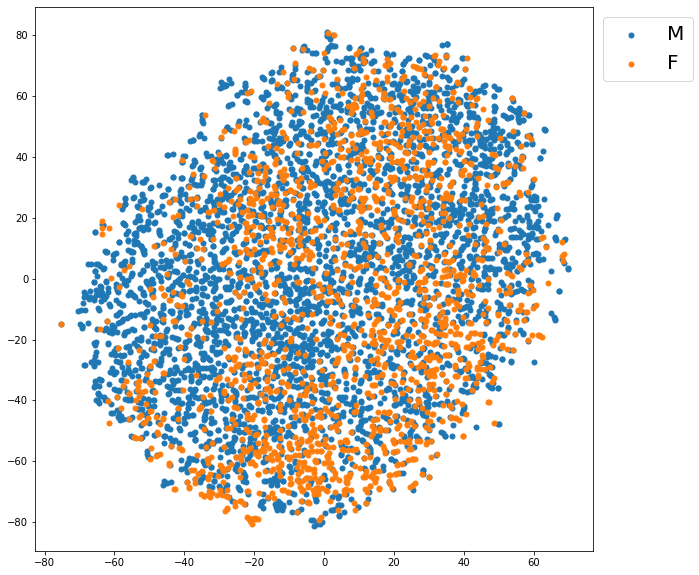

In [55]:
# Visualize users labelled by genders
t_sne = TSNE(n_components=2)
U_tsne = t_sne.fit_transform(U.transpose())

plt.figure(figsize=(10,10)) 

for gender in ['M', 'F']:
    mask = np.array(users[['Gender']]) == gender
    mask = [mask[i][0] for i in range(len(mask))]
    plt.scatter(U_tsne[mask, 0], U_tsne[mask, 1], label=gender, s=25, alpha=1)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=20)

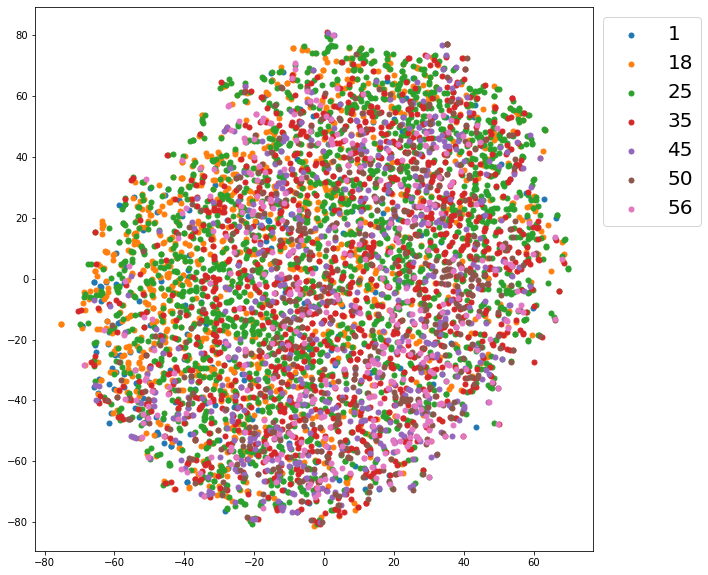

In [56]:
# Visualize users labelled by age
plt.figure(figsize=(10,10)) 
ages = np.unique(users['Age'])

for age in ages:
    mask = np.array(users[['Age']]) == age
    mask = [mask[i][0] for i in range(len(mask))]
    plt.scatter(U_tsne[mask, 0], U_tsne[mask, 1], label=age, s=25, alpha=1)

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=20)

AttributeError: 'NoneType' object has no attribute 'create_artists'

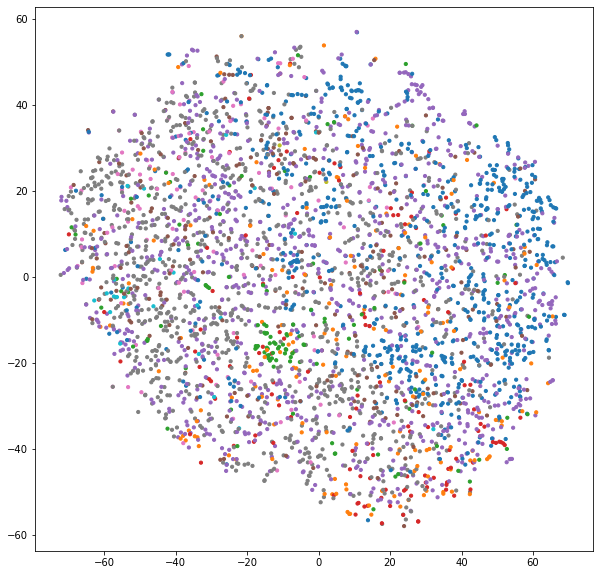

In [128]:
# Visualize movies labelled by genre
t_sne = TSNE(n_components=2)
M_tsne = t_sne.fit_transform(M)

plt.figure(figsize=(10,10)) 
i=0
labels = []
groups_c = []
colours = np.zeros((M_tsne.shape[0],3))

for genre in G:
    mask = np.array(genres) == genre
    #mask = [mask[i][0] for i in range(len(mask))]
    c = palette[i]
    if not c in groups_c:
        groups_c += [c]
    colours[mask,:] = c
    if not genre in labels:
        labels += [genre]
    i+=1
    
plt.scatter(M_tsne[:, 0], M_tsne[:, 1], s=10, alpha=1, c = colours)

plt.legend(groups_c, labels,bbox_to_anchor=(1.00, 1),loc='upper left',fontsize=20)

AttributeError: 'NoneType' object has no attribute 'create_artists'

<Figure size 720x720 with 0 Axes>

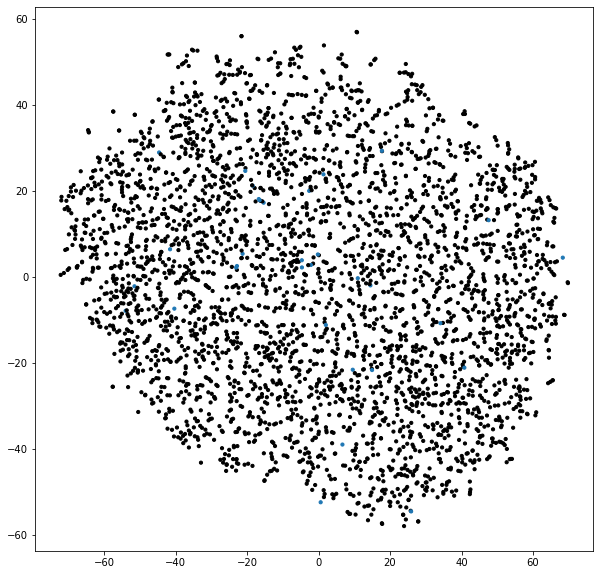

In [135]:
# Visualize movies labelled by year of release
plt.figure(figsize=(10,10)) 

plt.figure(figsize=(10,10)) 
i=0
labels = []
groups_c = []
colours = np.zeros((M_tsne.shape[0],3))


for date in D:
    mask = np.array(genres) == genre
    #mask = [mask[i][0] for i in range(len(mask))]
    c = palette[i]
    if not c in groups_c:
        groups_c += [c]
    colours[mask,:] = c
    if not date in labels:
        labels += [date]
    i+=1
    
plt.scatter(M_tsne[:, 0], M_tsne[:, 1], s=10, alpha=1, c = colours)

plt.legend(groups_c, labels,bbox_to_anchor=(1.00, 1),loc='upper left',fontsize=20)